In [3]:
import os

print(os.path.abspath(os.curdir))

e:\Data Kuliah\S2 ITS\Semester 6\IEEE Access\DroMoLog\notebooks


In [4]:
import os
os.chdir("..")

In [5]:
print(os.path.abspath(os.curdir))

e:\Data Kuliah\S2 ITS\Semester 6\IEEE Access\DroMoLog


In [6]:
# Analyzing the effect of increasing the prediction threshold during inference

def re_predict(pred_df, threshold):
    for index, row in pred_df.iterrows():
        if row['prob_high'] >= threshold:
            pred_df.at[index, 'pred'] = 'high'
        elif row['prob_medium'] >= threshold:
            pred_df.at[index, 'pred'] = 'medium'
        elif row['prob_low'] >= threshold:
            pred_df.at[index, 'pred'] = 'low'
        else:
            pred_df.at[index, 'pred'] = 'normal'
                        
    return pred_df

In [15]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

pred_df = pd.read_excel('../Bahan/best_model_backup/multitask_15/prediction.xlsx')
thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
acc_list = []
pre_list = []
rec_list = []
f1_list = []

for threshold in thresholds:
    repred_df = re_predict(pred_df, threshold)
    acc_now = accuracy_score(repred_df['label'].to_list(), repred_df['pred'].to_list())
    pre_now = precision_score(repred_df['label'].to_list(), repred_df['pred'].to_list(), average='weighted')
    rec_now = recall_score(repred_df['label'].to_list(), repred_df['pred'].to_list(), average='weighted')
    f1_now = f1_score(repred_df['label'].to_list(), repred_df['pred'].to_list(), average='weighted')
    
    acc_list.append(round(acc_now * 100, 3))
    pre_list.append(round(pre_now * 100, 3))
    rec_list.append(round(rec_now * 100, 3))
    f1_list.append(round(f1_now * 100, 3))
    classification_report_result = classification_report(
        repred_df['label'].to_list(), repred_df['pred'].to_list(), digits=5)
    # print(f'threshold: {threshold}')
    # print(f'classification_report: {classification_report_result}')

In [17]:
import pandas as pd
from sklearn.metrics import classification_report

pred_unfiltered_df = pd.read_excel('../Bahan/best_model_backup/multitask_15_un/prediction.xlsx')
thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
acc_list_un = []
pre_list_un = []
rec_list_un = []
f1_list_un = []

for threshold in thresholds:
    repred_unfiltered_df = re_predict(pred_unfiltered_df, threshold)
    acc_now_un = accuracy_score(repred_unfiltered_df['label'].to_list(), repred_unfiltered_df['pred'].to_list())
    pre_now_un = precision_score(repred_unfiltered_df['label'].to_list(), repred_unfiltered_df['pred'].to_list(), average='weighted')
    rec_now_un = recall_score(repred_unfiltered_df['label'].to_list(), repred_unfiltered_df['pred'].to_list(), average='weighted')
    f1_now_un = f1_score(repred_unfiltered_df['label'].to_list(), repred_unfiltered_df['pred'].to_list(), average='weighted')
    acc_list_un.append(round(acc_now_un * 100, 3))
    pre_list_un.append(round(pre_now_un * 100, 3))
    rec_list_un.append(round(rec_now_un * 100, 3))
    f1_list_un.append(round(f1_now_un * 100, 3))
    classification_report_result = classification_report(
        repred_unfiltered_df['label'].to_list(), repred_unfiltered_df['pred'].to_list(), digits=5)
    # print(f'threshold: {threshold}')
    # print(f'classification_report: {classification_report_result}')

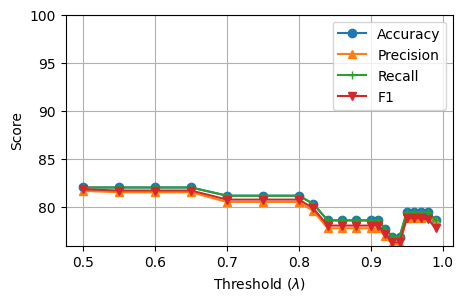

In [29]:
import matplotlib.pyplot as plt
import os
plt.figure(figsize=(5, 3))
# Plotting
plt.plot(thresholds, acc_list, label='Accuracy', marker='o')
plt.plot(thresholds, pre_list, label='Precision', marker='^')
plt.plot(thresholds, rec_list, label='Recall', marker='+')
plt.plot(thresholds, f1_list, label='F1', marker='v')
# plt.plot(thresholds, acc_list_un, label='U-Acc')
# plt.plot(thresholds, f1_list_un, label='U-F1')
# Set the range of the y-axis
# ax.set_ylim(50, 100)
# ax.set_xlabel('Threshold')
# ax.set_ylabel('Score')
# Adding labels and title
plt.xlabel('Threshold ($\lambda$)')
plt.ylabel('Score')

# plt.title('Effect of Threshold on Accuracy and F1 Score')
plt.legend(loc='upper right')
plt.ylim(76, 100)

# Show plot
plt.grid(True)
plt.savefig(os.path.join('visualization', "threshold_f.pdf"), bbox_inches='tight')
plt.show()
plt.close()

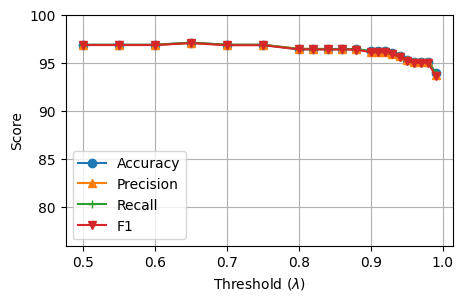

In [30]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(thresholds, acc_list_un, label='Accuracy', marker='o')
plt.plot(thresholds, pre_list_un, label='Precision', marker='^')
plt.plot(thresholds, rec_list_un, label='Recall', marker='+')
plt.plot(thresholds, f1_list_un, label='F1', marker='v')

# Adding labels and title
plt.xlabel('Threshold ($\lambda$)')
plt.ylabel('Score')
plt.ylim(76, 100)
# plt.title('Effect of Threshold on Accuracy and F1 Score')
plt.legend(loc='lower left')

# Show plot
plt.grid(True)
plt.savefig(os.path.join('visualization', "threshold_u.pdf"), bbox_inches='tight')
plt.show()
plt.close()